# The MNIST Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
import tensorflow
from tensorflow.keras.optimizers import Adam # - Works ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from keras.layers import Dense

In [2]:
from keras.datasets import mnist

In [3]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
unique ,counts = np.unique(y_train , return_counts = True)
print("Train labels: ",dict(zip(unique , counts))) 

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [6]:
unique ,counts = np.unique(y_test , return_counts = True)
print("Test labels: ",dict(zip(unique , counts))) 

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [7]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

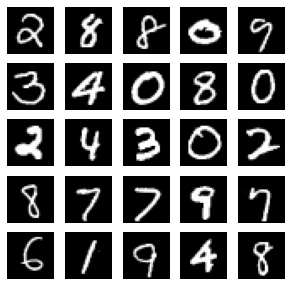

In [8]:
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()

In [9]:
num_labels = len(np.unique(y_train))
num_labels

10

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
image_size = x_train.shape[1]
input_size = image_size*image_size
input_size

784

In [13]:
x_train = np.reshape(x_train, [-1, input_size]) #add -1 to match new reshape with original train data.
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [14]:
x_train.shape

(60000, 784)

In [15]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [16]:
model = Sequential()
model.add(Dense(hidden_units,input_dim = input_size , activation = 'relu'))
model.add(Dense(hidden_units, activation = 'relu'))
model.add(Dense(num_labels, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [18]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
!pip install pydot

In [20]:
!pip install graphviz

In [21]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

h = model.fit(x_train , y_train , epochs = 20 ,batch_size = batch_size , validation_split = 0.3)

Epoch 1/20
329/329 [==============================] - 4s 11ms/step - loss: 0.3130 - accuracy: 0.9105 - val_loss: 0.1583 - val_accuracy: 0.9518
Epoch 2/20
329/329 [==============================] - 4s 12ms/step - loss: 0.1122 - accuracy: 0.9672 - val_loss: 0.1274 - val_accuracy: 0.9616
Epoch 3/20
329/329 [==============================] - 4s 12ms/step - loss: 0.0739 - accuracy: 0.9771 - val_loss: 0.1075 - val_accuracy: 0.9669
Epoch 4/20
329/329 [==============================] - 3s 10ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.1085 - val_accuracy: 0.9680
Epoch 5/20
329/329 [==============================] - 3s 9ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0975 - val_accuracy: 0.9711
Epoch 6/20
329/329 [==============================] - 3s 9ms/step - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.1003 - val_accuracy: 0.9719
Epoch 7/20
329/329 [==============================] - 3s 10ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.1005 - val_accuracy: 0.9732
E

In [22]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.1405 - accuracy: 0.9741

Test accuracy: 97.4%


In [23]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0571 - accuracy: 0.9884

Test accuracy: 98.8%


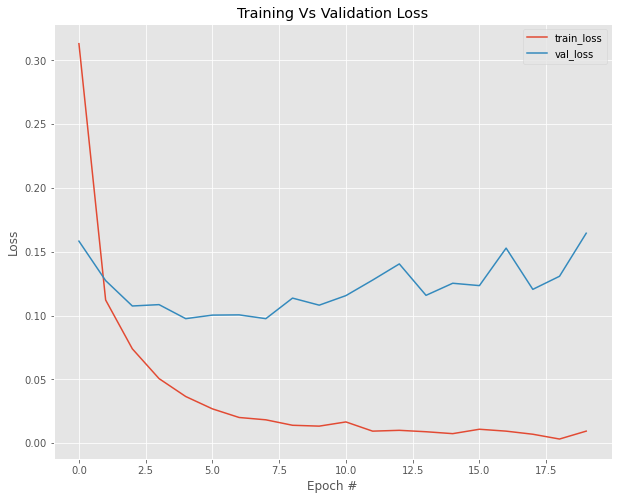

In [24]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(h.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, h.history["loss"], label="train_loss")
plt.plot(epochs, h.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding L2 Regualarisation

In [25]:
from keras.layers import Dense , Activation , Dropout
import keras


model = Sequential()
model.add(Dense(hidden_units , input_dim = input_size , kernel_regularizer  = keras.regularizers.l2(0.001) ))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))


model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam' , 
             metrics = ['accuracy'])
H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3)

Epoch 1/20
329/329 [==============================] - 7s 14ms/step - loss: 0.4961 - accuracy: 0.9114 - val_loss: 0.2882 - val_accuracy: 0.9509
Epoch 2/20
329/329 [==============================] - 4s 13ms/step - loss: 0.2367 - accuracy: 0.9609 - val_loss: 0.2084 - val_accuracy: 0.9644
Epoch 3/20
329/329 [==============================] - 5s 14ms/step - loss: 0.1754 - accuracy: 0.9711 - val_loss: 0.1813 - val_accuracy: 0.9678
Epoch 4/20
329/329 [==============================] - 4s 12ms/step - loss: 0.1485 - accuracy: 0.9760 - val_loss: 0.1881 - val_accuracy: 0.9624
Epoch 5/20
329/329 [==============================] - 4s 12ms/step - loss: 0.1308 - accuracy: 0.9790 - val_loss: 0.1661 - val_accuracy: 0.9692
Epoch 6/20
329/329 [==============================] - 4s 12ms/step - loss: 0.1220 - accuracy: 0.9809 - val_loss: 0.1527 - val_accuracy: 0.9724
Epoch 7/20
329/329 [==============================] - 5s 14ms/step - loss: 0.1160 - accuracy: 0.9820 - val_loss: 0.1807 - val_accuracy: 0.9604

In [26]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1239 - accuracy: 0.9759

Test accuracy: 97.6%


In [27]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0923 - accuracy: 0.9864

Test accuracy: 98.6%


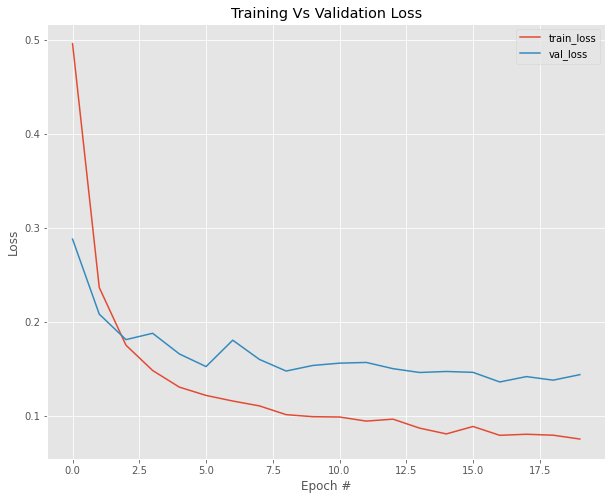

In [28]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding Dropout

In [29]:
from keras.layers import Dense , Activation, Dropout

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3)


Epoch 1/20
329/329 [==============================] - 5s 13ms/step - loss: 0.4979 - accuracy: 0.8448 - val_loss: 0.1973 - val_accuracy: 0.9405
Epoch 2/20
329/329 [==============================] - 4s 11ms/step - loss: 0.2268 - accuracy: 0.9330 - val_loss: 0.1412 - val_accuracy: 0.9576
Epoch 3/20
329/329 [==============================] - 3s 9ms/step - loss: 0.1732 - accuracy: 0.9485 - val_loss: 0.1208 - val_accuracy: 0.9634
Epoch 4/20
329/329 [==============================] - 3s 9ms/step - loss: 0.1487 - accuracy: 0.9553 - val_loss: 0.1099 - val_accuracy: 0.9673
Epoch 5/20
329/329 [==============================] - 3s 8ms/step - loss: 0.1260 - accuracy: 0.9614 - val_loss: 0.1040 - val_accuracy: 0.9677
Epoch 6/20
329/329 [==============================] - 3s 9ms/step - loss: 0.1145 - accuracy: 0.9657 - val_loss: 0.1013 - val_accuracy: 0.9721
Epoch 7/20
329/329 [==============================] - 4s 11ms/step - loss: 0.1025 - accuracy: 0.9685 - val_loss: 0.0955 - val_accuracy: 0.9728
Epo

In [30]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0718 - accuracy: 0.9794

Test accuracy: 97.9%


In [31]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9911

Test accuracy: 99.1%


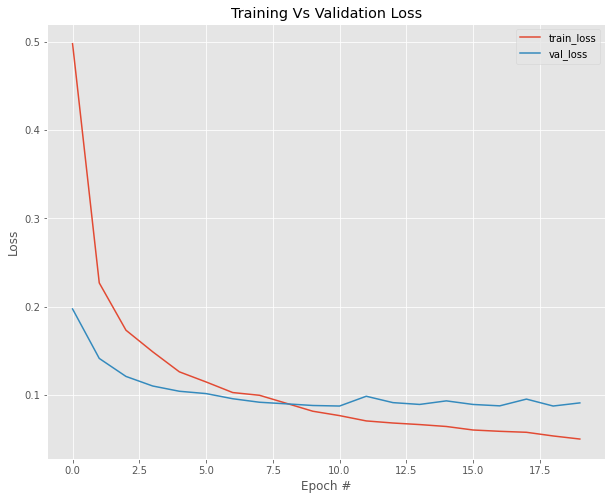

In [32]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()